# import library

In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df=pd.read_csv("/kaggle/input/dataset-for-bank-loan-prediction/credit_train.csv")

In [90]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

# Data Pre-processing

In [92]:
df.drop_duplicates(inplace=True)

In [93]:
df.isnull().sum()/df.shape[0]*100

Loan ID                          0.001114
Customer ID                      0.001114
Loan Status                      0.001114
Current Loan Amount              0.001114
Term                             0.001114
Credit Score                    21.334061
Annual Income                   21.334061
Years in current job             4.235627
Home Ownership                   0.001114
Purpose                          0.001114
Monthly Debt                     0.001114
Years of Credit History          0.001114
Months since last delinquent    53.836901
Number of Open Accounts          0.001114
Number of Credit Problems        0.001114
Current Credit Balance           0.001114
Maximum Open Credit              0.003341
Bankruptcies                     0.212728
Tax Liens                        0.011138
dtype: float64

In [94]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

## missing Value

In [95]:
df["Annual Income"]=df["Annual Income"].fillna(method="backfill")

# df["Credit Score"]=df["Credit Score"].fillna(method="pad")
df["Credit Score"]=df["Credit Score"].interpolate(method='linear')

df["Months since last delinquent"]=df["Months since last delinquent"].fillna(method="backfill")
# df=df.drop(columns="Months since last delinquent",axis=1)

df=df.drop(columns="Loan ID",axis=1)
df=df.drop(columns="Customer ID",axis=1)

df=df.dropna()

In [96]:
df.isnull().sum()/df.shape[0]*100

Loan Status                     0.0
Current Loan Amount             0.0
Term                            0.0
Credit Score                    0.0
Annual Income                   0.0
Years in current job            0.0
Home Ownership                  0.0
Purpose                         0.0
Monthly Debt                    0.0
Years of Credit History         0.0
Months since last delinquent    0.0
Number of Open Accounts         0.0
Number of Credit Problems       0.0
Current Credit Balance          0.0
Maximum Open Credit             0.0
Bankruptcies                    0.0
Tax Liens                       0.0
dtype: float64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85790 entries, 0 to 99997
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Status                   85790 non-null  object 
 1   Current Loan Amount           85790 non-null  float64
 2   Term                          85790 non-null  object 
 3   Credit Score                  85790 non-null  float64
 4   Annual Income                 85790 non-null  float64
 5   Years in current job          85790 non-null  object 
 6   Home Ownership                85790 non-null  object 
 7   Purpose                       85790 non-null  object 
 8   Monthly Debt                  85790 non-null  float64
 9   Years of Credit History       85790 non-null  float64
 10  Months since last delinquent  85790 non-null  float64
 11  Number of Open Accounts       85790 non-null  float64
 12  Number of Credit Problems     85790 non-null  float64
 13  C

In [98]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(' ', '_')  # Replace spaces with underscores

In [99]:
df.columns

Index(['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

/tmp/ipykernel_32/4169372550.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True,)


<Axes: >

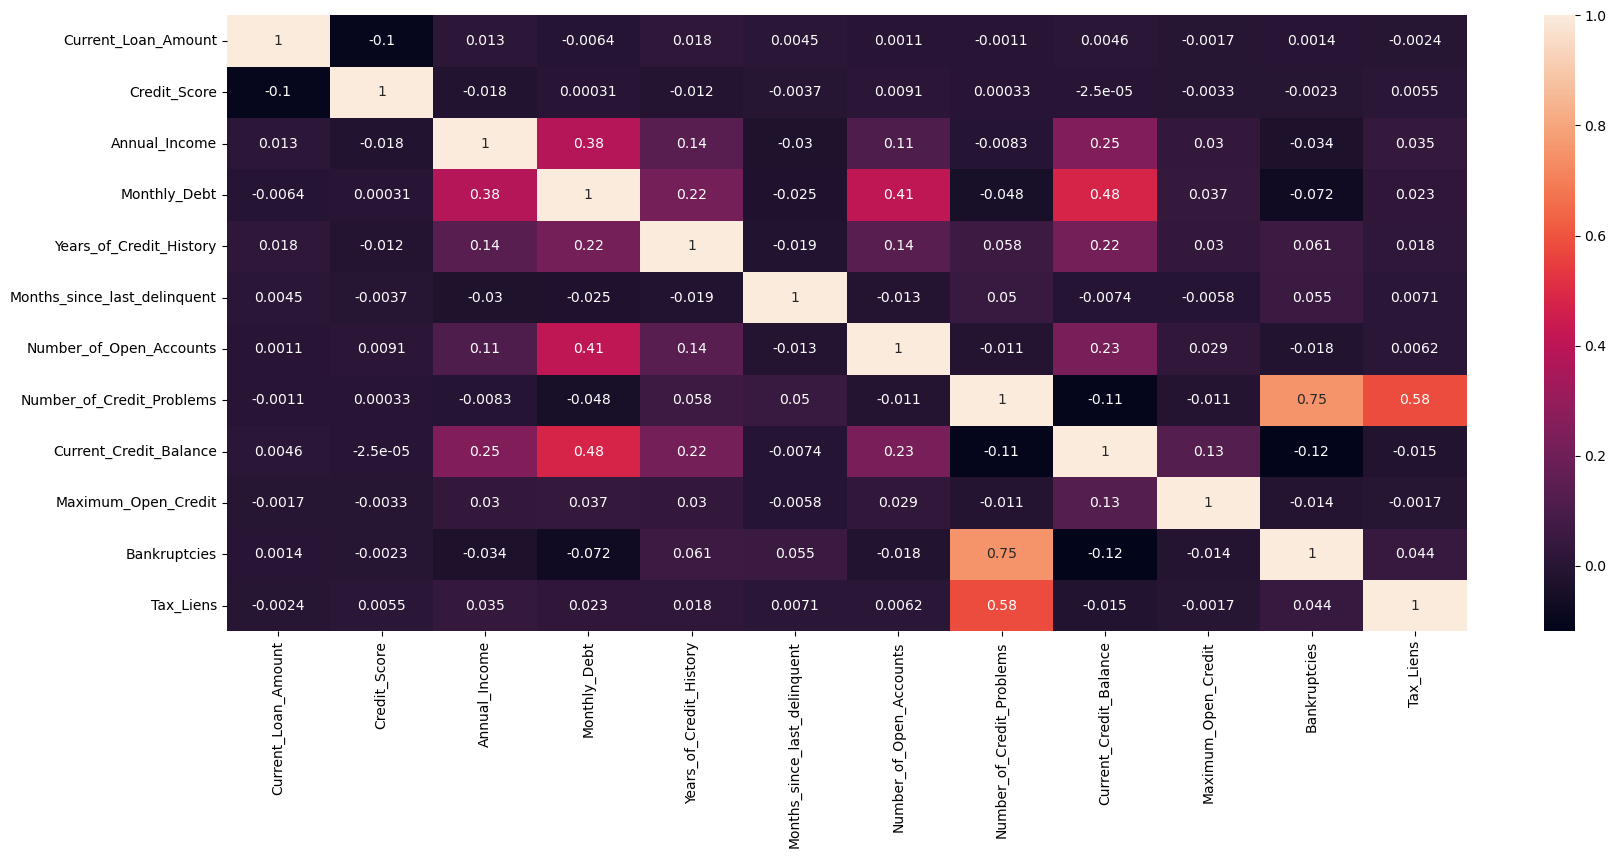

In [100]:
plt.figure(figsize=(20,8))
sns.heatmap(data=df.corr(), annot=True,)


## Encoding

In [101]:
df.sample(15)

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
28208,Fully Paid,221166.0,Short Term,726.000000,1258864.0,10+ years,Home Mortgage,Debt Consolidation,27170.38,26.3,12.0,8.0,0.0,311144.0,416020.0,0.0,0.0
49260,Fully Paid,167354.0,Short Term,740.500000,548321.0,7 years,Rent,Business Loan,7878.16,14.5,3.0,10.0,0.0,88445.0,578600.0,0.0,0.0
92408,Fully Paid,99999999.0,Long Term,694.000000,984086.0,3 years,Rent,Debt Consolidation,13777.28,11.4,45.0,8.0,0.0,284981.0,510796.0,0.0,0.0
78545,Fully Paid,99999999.0,Long Term,640.000000,1559710.0,10+ years,Home Mortgage,Debt Consolidation,32493.99,11.6,78.0,15.0,0.0,254239.0,535238.0,0.0,0.0
46313,Fully Paid,62722.0,Short Term,713.000000,773756.0,3 years,Home Mortgage,Debt Consolidation,14637.03,11.1,15.0,5.0,0.0,14307.0,29150.0,0.0,0.0
9927,Fully Paid,89848.0,Short Term,742.000000,969950.0,1 year,Rent,other,10103.63,46.7,21.0,18.0,0.0,113430.0,226820.0,0.0,0.0
94880,Fully Paid,471152.0,Long Term,688.000000,1017279.0,< 1 year,Rent,Debt Consolidation,14496.24,8.5,26.0,7.0,0.0,115444.0,218064.0,0.0,0.0
65717,Fully Paid,84018.0,Short Term,746.000000,914128.0,5 years,Rent,Debt Consolidation,12835.83,20.9,56.0,5.0,1.0,24757.0,281138.0,1.0,0.0
73265,Fully Paid,772464.0,Short Term,739.666667,1497352.0,3 years,Own Home,Debt Consolidation,21729.35,10.5,50.0,10.0,0.0,549043.0,859122.0,0.0,0.0
85160,Fully Paid,217668.0,Short Term,746.000000,1973853.0,10+ years,Home Mortgage,Debt Consolidation,14326.95,16.3,4.0,10.0,0.0,82422.0,470074.0,0.0,0.0


In [102]:
df1=df.copy()

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85790 entries, 0 to 99997
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan_Status                   85790 non-null  object 
 1   Current_Loan_Amount           85790 non-null  float64
 2   Term                          85790 non-null  object 
 3   Credit_Score                  85790 non-null  float64
 4   Annual_Income                 85790 non-null  float64
 5   Years_in_current_job          85790 non-null  object 
 6   Home_Ownership                85790 non-null  object 
 7   Purpose                       85790 non-null  object 
 8   Monthly_Debt                  85790 non-null  float64
 9   Years_of_Credit_History       85790 non-null  float64
 10  Months_since_last_delinquent  85790 non-null  float64
 11  Number_of_Open_Accounts       85790 non-null  float64
 12  Number_of_Credit_Problems     85790 non-null  float64
 13  C

In [105]:
df1.columns

Index(['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [106]:
cols= ['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']

In [107]:
df1.shape

(85790, 17)

In [108]:
df1[cols]=df1[cols].apply(LabelEncoder().fit_transform)
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_Status,85790.0,0.751544,0.432120,0.0,1.00,1.0,1.00,1.0
Current_Loan_Amount,85790.0,11464.106609,6770.839982,0.0,5681.00,10953.5,17631.75,21668.0
Term,85790.0,0.729922,0.444002,0.0,0.00,1.0,1.00,1.0
Credit_Score,85790.0,702.354494,482.166802,0.0,453.00,645.0,795.00,2495.0
Annual_Income,85790.0,16599.983215,9181.530547,0.0,9078.00,16028.5,23838.00,35132.0
Years_in_current_job,85790.0,3.757582,3.178792,0.0,1.00,3.0,6.00,10.0
Home_Ownership,85790.0,1.933116,0.956125,0.0,1.00,2.0,3.00,3.0
Purpose,85790.0,3.774088,2.234137,0.0,3.00,3.0,3.00,15.0
Monthly_Debt,85790.0,30947.661033,17711.884771,0.0,15997.25,30478.5,45764.75,63409.0
Years_of_Credit_History,85790.0,144.350181,68.037746,0.0,98.00,133.0,179.00,492.0


# Outliers

Loan_Status                         Axes(0.125,0.77;0.110714x0.11)
Current_Loan_Amount              Axes(0.257857,0.77;0.110714x0.11)
Term                             Axes(0.390714,0.77;0.110714x0.11)
Credit_Score                     Axes(0.523571,0.77;0.110714x0.11)
Annual_Income                    Axes(0.656429,0.77;0.110714x0.11)
Years_in_current_job             Axes(0.789286,0.77;0.110714x0.11)
Home_Ownership                     Axes(0.125,0.638;0.110714x0.11)
Purpose                         Axes(0.257857,0.638;0.110714x0.11)
Monthly_Debt                    Axes(0.390714,0.638;0.110714x0.11)
Years_of_Credit_History         Axes(0.523571,0.638;0.110714x0.11)
Months_since_last_delinquent    Axes(0.656429,0.638;0.110714x0.11)
Number_of_Open_Accounts         Axes(0.789286,0.638;0.110714x0.11)
Number_of_Credit_Problems          Axes(0.125,0.506;0.110714x0.11)
Current_Credit_Balance          Axes(0.257857,0.506;0.110714x0.11)
Maximum_Open_Credit             Axes(0.390714,0.506;0.110714x0

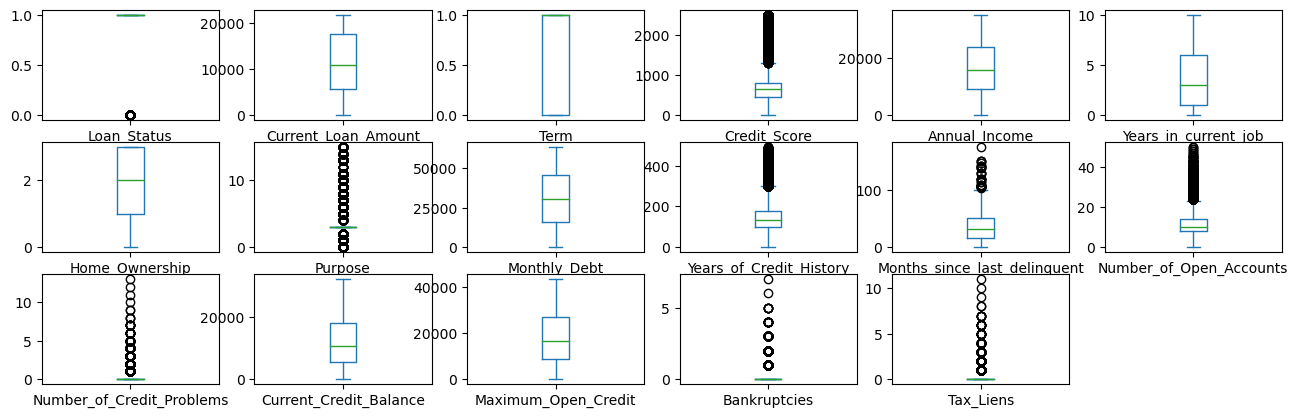

In [109]:
df1.plot(kind = "box" , subplots = True , figsize = (16,10) , layout = (6,6))

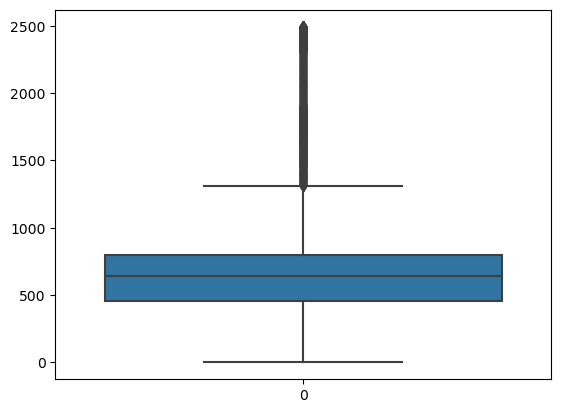

In [110]:
sns.boxplot(data = df1["Credit_Score"])
plt.show()


In [111]:
df_out=df1[df1["Credit_Score"]>=1250].index

In [112]:
df1.drop(df_out,inplace=True)

Loan_Status                         Axes(0.125,0.77;0.110714x0.11)
Current_Loan_Amount              Axes(0.257857,0.77;0.110714x0.11)
Term                             Axes(0.390714,0.77;0.110714x0.11)
Credit_Score                     Axes(0.523571,0.77;0.110714x0.11)
Annual_Income                    Axes(0.656429,0.77;0.110714x0.11)
Years_in_current_job             Axes(0.789286,0.77;0.110714x0.11)
Home_Ownership                     Axes(0.125,0.638;0.110714x0.11)
Purpose                         Axes(0.257857,0.638;0.110714x0.11)
Monthly_Debt                    Axes(0.390714,0.638;0.110714x0.11)
Years_of_Credit_History         Axes(0.523571,0.638;0.110714x0.11)
Months_since_last_delinquent    Axes(0.656429,0.638;0.110714x0.11)
Number_of_Open_Accounts         Axes(0.789286,0.638;0.110714x0.11)
Number_of_Credit_Problems          Axes(0.125,0.506;0.110714x0.11)
Current_Credit_Balance          Axes(0.257857,0.506;0.110714x0.11)
Maximum_Open_Credit             Axes(0.390714,0.506;0.110714x0

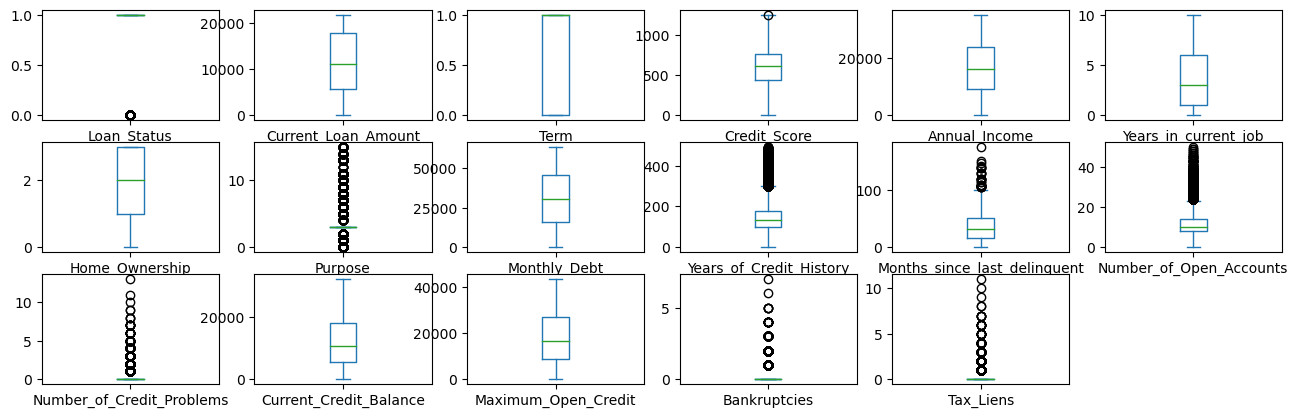

In [113]:
df1.plot(kind = "box" , subplots = True , figsize = (16,10) , layout = (6,6))

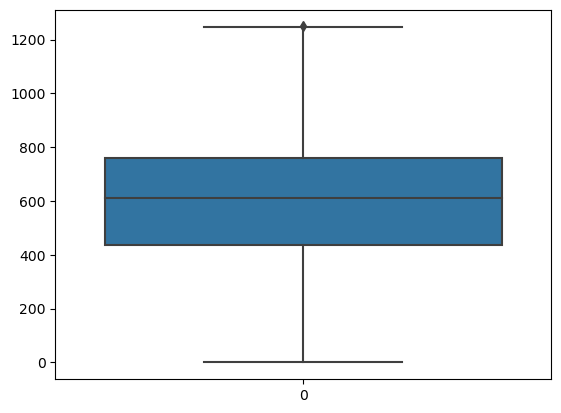

In [114]:
sns.boxplot(data = df1["Credit_Score"])
plt.show()


remove outliers in Credit_Score

Index(['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'],
      dtype='object')

In [116]:

def remove_outliers(data, column, method="iqr", threshold=1.5):
    """
    Removes outliers from a dataset using IQR or Z-score methods.
    
    Parameters:
    - data: pd.DataFrame or pd.Series - The dataset.
    - column: str - The column name to check for outliers.
    - method: str - Method for detecting outliers ('iqr' or 'zscore'). Default is 'iqr'.
    - threshold: float - Threshold for detecting outliers (IQR multiplier or Z-score). Default is 1.5.
    
    Returns:
    - pd.DataFrame - Dataset with outliers removed.
    """
    if method == "iqr":
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine the lower and upper bounds
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        # Filter out outliers
        filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    elif method == "zscore":
        # Calculate Z-scores
        mean = data[column].mean()
        std = data[column].std()
        z_scores = (data[column] - mean) / std

        # Filter out outliers
        filtered_data = data[np.abs(z_scores) <= threshold]
    
    else:
        raise ValueError("Method must be 'iqr' or 'zscore'.")
    
    return filtered_data


In [122]:
# Remove outliers using the IQR method
df = remove_outliers(df1, column=['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens'], method="iqr", threshold=1.5)
print("Filtered Data (IQR):")
print(df)


Filtered Data (IQR):
       Loan_Status  Current_Loan_Amount  Term  Credit_Score  Annual_Income  \
0              1.0                15209     1         453.0          15602   
1              1.0                 8778     1         611.0          29417   
2              1.0                21668     1         784.0          29417   
3              1.0                11941     0         565.0           7956   
6              1.0                 7001     1         667.0          15899   
...            ...                  ...   ...           ...            ...   
99990          1.0                21668     1         795.0          15995   
99992          1.0                  585     1         673.0           7423   
99994          1.0                 6696     1         546.0           7423   
99996          1.0                21668     1         691.0          17774   
99997          1.0                 2353     1         795.0          15243   

       Years_in_current_job  Home_Ownershi

In [123]:
df.groupby(["Loan_Status"]).value_counts().sum()

41144

# Data Ratio

<Axes: xlabel='Loan_Status', ylabel='count'>

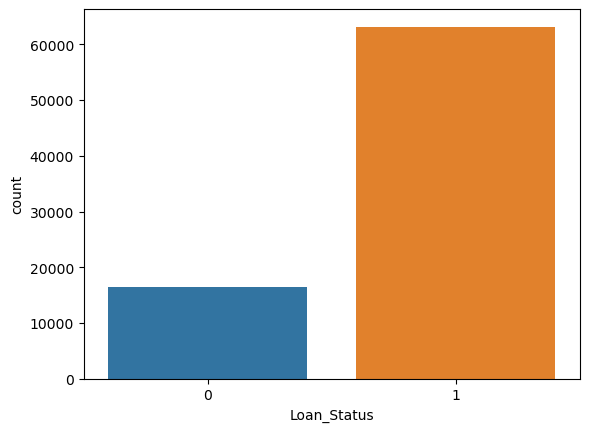

In [124]:
sns.countplot(x="Loan_Status",data=df1)

Loan_Status is Fully Paid 80%

Loan_Status is Charged off 20%

## Split Data

In [125]:
from sklearn.model_selection import train_test_split


In [126]:
x=df1.drop(labels="Loan_Status",axis=1)
y=df1["Loan_Status"]

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size= 0.25 , random_state= 42)

In [128]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [129]:
from imblearn.over_sampling import RandomOverSampler


In [130]:
ROS=RandomOverSampler(random_state=42)

In [131]:
x_res,y_res=ROS.fit_resample(x,y)

In [132]:
from collections import Counter

In [133]:
print("Orignal dataset: ", Counter(y))
print("Updata dataset: ",Counter(y_res))

Orignal dataset:  Counter({1: 63150, 0: 16516})
Updata dataset:  Counter({1: 63150, 0: 63150})


## Data scaling with standerdscaler

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,random_state=42,test_size=0.33)

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
sc=StandardScaler()

In [137]:
x_train=sc.fit_transform(x_train)

In [138]:
x_test=sc.fit_transform(x_test)

# Model SVM

In [139]:
from sklearn.svm import SVC

In [140]:
svm=SVC(C=1.0,kernel='rbf')

In [141]:
# svm.fit(x_train,y_train)

In [142]:
# y_pred=svm.predict(x_test)
# y_pred

In [143]:
#print(svm.score(x_train,y_train))
#print(svm.score(x_test,y_test))

# LogisticRegression

In [144]:
from sklearn.linear_model import LogisticRegression


In [145]:
Lr=LogisticRegression(C=0.1,penalty='l1',solver='saga')

In [146]:
Lr.fit(x_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [147]:
y_pred_1=Lr.predict(x_test)
y_pred_1

array([1, 1, 0, ..., 0, 0, 1])

In [148]:
print(Lr.score(x_train,y_train))
print(Lr.score(x_test,y_test))

0.6100967844861205
0.6080040308068811


# KNN

In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [151]:
# print(knn.score(x_train,y_train))
# print(knn.score(x_test,y_test))

# decision tree

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
dt = DecisionTreeClassifier(max_depth= 3 , max_features= 4)

In [154]:
dt.fit(x_train ,y_train)

DecisionTreeClassifier(max_depth=3, max_features=4)

In [155]:
print (dt.score(x_train , y_train))
print (dt.score(x_test , y_test))


0.5761099490670165
0.5743180018714461


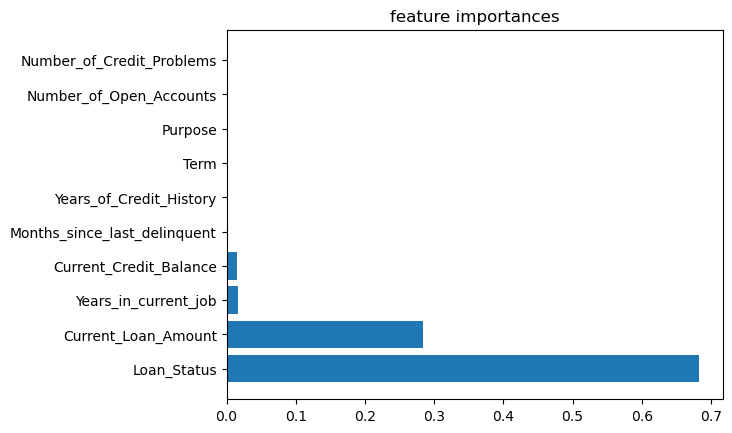

In [156]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']

f_importances(abs(dt.feature_importances_), features_names, top=10)


# Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

In [158]:
rf = RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)

In [159]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=3, max_features=3, n_estimators=5)

In [160]:
print (rf.score(x_train , y_train))
print (rf.score(x_test , y_test))


0.6253175925597665
0.6250869742556203


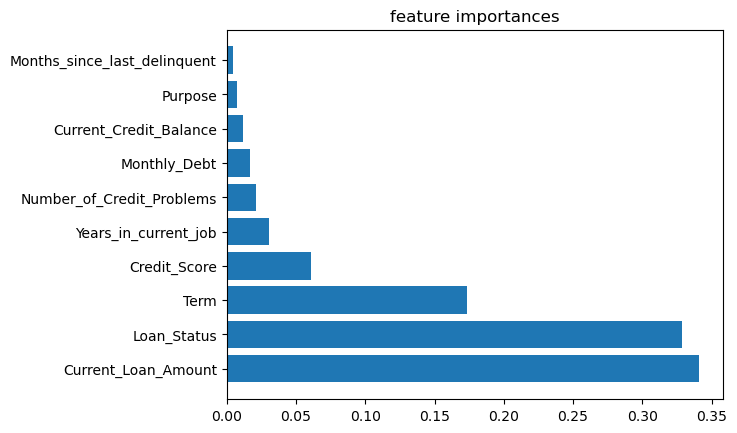

In [161]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

# whatever your features are called
features_names = ['Loan_Status', 'Current_Loan_Amount', 'Term', 'Credit_Score',
       'Annual_Income', 'Years_in_current_job', 'Home_Ownership', 'Purpose',
       'Monthly_Debt', 'Years_of_Credit_History',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Number_of_Credit_Problems', 'Current_Credit_Balance',
       'Maximum_Open_Credit', 'Bankruptcies', 'Tax_Liens']

f_importances(abs(rf.feature_importances_), features_names, top=10)


# model XGboost

In [162]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [163]:
from xgboost import XGBClassifier

In [164]:
xgb=XGBClassifier(missing=10 , max_depth=4,  n_estimators=6,learning_rate=0.4)

In [165]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=10, monotone_constraints=None,
              n_estimators=6, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [166]:
print (xgb.score(x_train , y_train))
print (xgb.score(x_test , y_test))

0.6381512863237258
0.6361956860769212


# model AdaBoost

In [167]:
from sklearn.ensemble import AdaBoostClassifier

In [168]:
ada=AdaBoostClassifier( n_estimators=4,learning_rate=0.4)

In [169]:
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.4, n_estimators=4)

In [170]:
print (ada.score(x_train , y_train))
print (ada.score(x_test , y_test))


0.6198106852908852
0.6182489982965043


# model Navie

In [171]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [172]:
# nv=MultinomialNB()

In [173]:
# nv.fit(x_train,y_train)

# ValueError: Negative values in data passed to MultinomialNB (input X)


In [174]:
# y_pred=nv.predict(x_test)

# Voting

In [175]:
from sklearn.ensemble import VotingClassifier

In [176]:
clf1=LogisticRegression()
clf2=AdaBoostClassifier( n_estimators=4,learning_rate=0.4)
clf3=XGBClassifier(missing=10 , max_depth=4,  n_estimators=6,learning_rate=0.4)
clf4= DecisionTreeClassifier(    max_depth= 3 , max_features= 4)
# clf5=KNeighborsClassifier(n_neighbors=10)
clf6=RandomForestClassifier(n_estimators= 5 , max_depth= 3 , max_features= 3)

In [177]:
v_clf=VotingClassifier(estimators=[('LR',clf1),('DT',clf4),('ada',clf2),('xgb',clf3),('rf',clf6)],voting ="hard")

In [178]:
v_clf.fit(x_train ,y_train)


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('DT',
                              DecisionTreeClassifier(max_depth=3,
                                                     max_features=4)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.4,
                                                 n_estimators=4)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categori...
                                            interaction_constraints=None,
                                            learning_rate=0.4, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=10,
                                            monotone_constraints=None,
                                            n_estimators=6, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     max_features=3,
                                                     n_estimators=5))])

In [179]:
print (v_clf.score(x_train , y_train))
print (v_clf.score(x_test , y_test))

0.6291464293733234
0.6277501859449602
